In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/train'
valid_path = '/content/drive/MyDrive/data/test'

In [ ]:
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/data/train/*')

In [ ]:
folders

['/content/drive/MyDrive/data/train/fresh cotton plant',
 '/content/drive/MyDrive/data/train/diseased cotton leaf',
 '/content/drive/MyDrive/data/train/diseased cotton plant',
 '/content/drive/MyDrive/data/train/fresh cotton leaf']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1965 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
62/62 [==============================] - 41s 612ms/step - loss: 1.6404 - accuracy: 0.7618 - val_loss: 0.1735 - val_accuracy: 0.8889
Epoch 2/20
62/62 [==============================] - 34s 550ms/step - loss: 0.8196 - accuracy: 0.8814 - val_loss: 0.0703 - val_accuracy: 0.9444
Epoch 3/20
62/62 [==============================] - 34s 548ms/step - loss: 0.6139 - accuracy: 0.9043 - val_loss: 0.0211 - val_accuracy: 1.0000
Epoch 4/20
62/62 [==============================] - 34s 541ms/step - loss: 0.4753 - accuracy: 0.9170 - val_loss: 0.7841 - val_accuracy: 0.7778
Epoch 5/20
62/62 [==============================] - 34s 546ms/step - loss: 0.5874 - accuracy: 0.9099 - val_loss: 0.0658 - val_accuracy: 0.9444
Epoch 6/20
62/62 [==============================] - 34s 544ms/step - loss: 0.5055 - accuracy: 0.9308 - val_loss: 0.2439 - val_accuracy: 0.8889
Epoch 7/20
62/62 [==============================] - 34s 542ms/step - loss: 0.3789 - accuracy: 0.9435 - val_loss: 1.8978 - val_accuracy: 0.8333

In [ ]:
import matplotlib.pyplot as plt

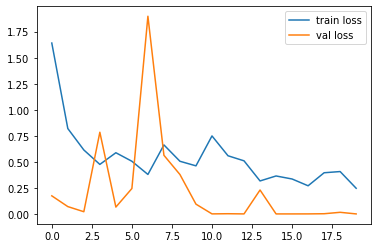

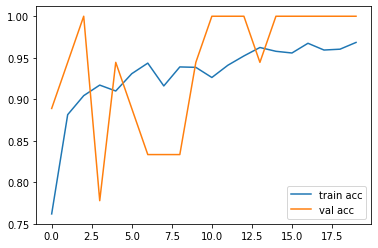

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[6.7609240e-19, 9.9976557e-01, 4.8670575e-18, 2.3439401e-04],
       [6.9807368e-28, 2.3748947e-13, 1.3927005e-24, 1.0000000e+00],
       [3.3783929e-14, 6.7332038e-30, 1.0000000e+00, 6.8154009e-24],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 4.8283257e-25],
       [6.3195422e-38, 5.7286807e-19, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 5.5070889e-29, 2.6828688e-27, 4.1191124e-38],
       [1.1770075e-15, 1.2270411e-14, 1.0000000e+00, 2.5337306e-12],
       [3.2476551e-14, 1.3733816e-15, 3.5575827e-11, 1.0000000e+00],
       [1.0000000e+00, 1.7800922e-09, 3.4394641e-33, 6.3027040e-26],
       [5.2547762e-38, 1.0000000e+00, 3.5457992e-20, 1.2180236e-26],
       [1.2590351e-17, 1.2909937e-24, 1.0000000e+00, 1.0780226e-19],
       [1.7280244e-36, 2.3367919e-35, 2.9660080e-27, 1.0000000e+00],
       [3.6038868e-15, 2.9331182e-13, 9.5423558e-24, 1.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 3.4945376e-31, 1.9358373e-33],
       [2.0841137e-24, 0.0000000e+

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 3, 2, 1, 3, 0, 2, 3, 0, 1, 2, 3, 3, 0, 2, 1, 1, 2])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [141]:
model=load_model('/content/model_inception.h5')

In [144]:
img=image.load_img('/content/drive/MyDrive/data/test/fresh cotton leaf/d (378).jpg',target_size=(224,224))


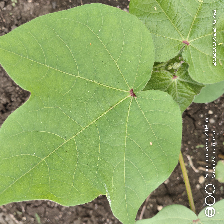

In [145]:
img

In [146]:
x=image.img_to_array(img)
x

array([[[ 50.,  43.,  35.],
        [ 53.,  48.,  42.],
        [ 63.,  56.,  50.],
        ...,
        [156., 191., 135.],
        [138., 173., 105.],
        [159., 193., 142.]],

       [[ 83.,  70.,  61.],
        [103.,  93.,  83.],
        [110.,  98.,  84.],
        ...,
        [121., 159.,  72.],
        [167., 196., 138.],
        [171., 204., 151.]],

       [[125., 111.,  98.],
        [152., 134., 120.],
        [166., 149., 133.],
        ...,
        [156., 186., 122.],
        [140., 175., 107.],
        [152., 188., 118.]],

       ...,

       [[182., 166., 151.],
        [179., 166., 149.],
        [172., 159., 143.],
        ...,
        [173., 202., 158.],
        [166., 193., 148.],
        [177., 203., 158.]],

       [[136., 124., 112.],
        [159., 146., 130.],
        [160., 148., 132.],
        ...,
        [181., 207., 160.],
        [177., 203., 158.],
        [176., 202., 155.]],

       [[104.,  95.,  80.],
        [124., 111.,  95.],
        [152., 1

In [147]:
x.shape

(224, 224, 3)

In [148]:
x=x/255

In [149]:
import numpy as np
x=np.expand_dims(x,axis=0)
x.shape

(1, 224, 224, 3)

In [150]:
x

array([[[[0.19607843, 0.16862746, 0.13725491],
         [0.20784314, 0.1882353 , 0.16470589],
         [0.24705882, 0.21960784, 0.19607843],
         ...,
         [0.6117647 , 0.7490196 , 0.5294118 ],
         [0.5411765 , 0.6784314 , 0.4117647 ],
         [0.62352943, 0.75686276, 0.5568628 ]],

        [[0.3254902 , 0.27450982, 0.23921569],
         [0.40392157, 0.3647059 , 0.3254902 ],
         [0.43137255, 0.38431373, 0.32941177],
         ...,
         [0.4745098 , 0.62352943, 0.28235295],
         [0.654902  , 0.76862746, 0.5411765 ],
         [0.67058825, 0.8       , 0.5921569 ]],

        [[0.49019608, 0.43529412, 0.38431373],
         [0.59607846, 0.5254902 , 0.47058824],
         [0.6509804 , 0.58431375, 0.52156866],
         ...,
         [0.6117647 , 0.7294118 , 0.47843137],
         [0.54901963, 0.6862745 , 0.41960785],
         [0.59607846, 0.7372549 , 0.4627451 ]],

        ...,

        [[0.7137255 , 0.6509804 , 0.5921569 ],
         [0.7019608 , 0.6509804 , 0.58431375]

In [151]:
model.predict(img_data)

array([[9.9985349e-01, 1.3940626e-04, 8.5924569e-08, 6.9649373e-06]],
      dtype=float32)

In [152]:
a=np.argmax(model.predict(img_data), axis=1)

In [153]:
a==0

array([ True])

# VGG16

In [165]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

Text(0.5, 1.0, 'Diseased Cotton Leaf')

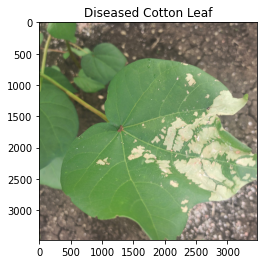

In [166]:
# Check images
img = cv2.imread("/content/drive/MyDrive/data/test/diseased cotton leaf/dis_leaf (124).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Diseased Cotton Leaf")

Text(0.5, 1.0, 'Fresh Cotton Leaf')

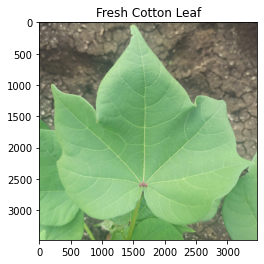

In [167]:
# Check images
img = cv2.imread("/content/drive/MyDrive/data/test/fresh cotton leaf/d (341).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Fresh Cotton Leaf")

Text(0.5, 1.0, 'Diseased Cotton Plant')

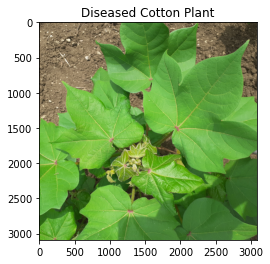

In [168]:
# Check images
img = cv2.imread("/content/drive/MyDrive/data/test/diseased cotton plant/dd (367).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Diseased Cotton Plant")

Text(0.5, 1.0, 'Fresh Cotton Plant')

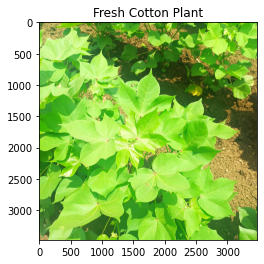

In [169]:
# Check images
img = cv2.imread("/content/drive/MyDrive/data/test/fresh cotton plant/dsd (405).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Fresh Cotton Plant")

In [170]:
train_generator= ImageDataGenerator(rescale=1./255,  shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_generator= ImageDataGenerator(rescale=1./255,  shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [171]:
train_data = train_generator.flow_from_directory( '/content/drive/MyDrive/data/train', target_size=(224, 224),
        batch_size=64)
test_data = test_generator.flow_from_directory( '/content/drive/MyDrive/data/test', target_size=(224, 224),
        batch_size=64)

Found 1965 images belonging to 4 classes.
Found 18 images belonging to 4 classes.


In [172]:
train_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [173]:
# Model creation with changes

model = VGG16(input_shape=(224,224,3),include_top=False)

for layer in model.layers:
    layer.trainable = False

newModel = model.output
newModel = AveragePooling2D()(newModel)
newModel = Flatten()(newModel)
newModel = Dense(128, activation="relu")(newModel)
newModel = Dropout(0.5)(newModel)
newModel = Dense(4, activation='softmax')(newModel)

model = Model(inputs=model.input, outputs=newModel)

In [174]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [175]:
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [176]:
history = model.fit(train_data,
                              validation_data=test_data,
                              epochs=10) 

Epoch 1/10
31/31 [==============================] - 39s 1s/step - loss: 1.1283 - accuracy: 0.5225 - val_loss: 0.3444 - val_accuracy: 0.9444
Epoch 2/10
31/31 [==============================] - 34s 1s/step - loss: 0.5155 - accuracy: 0.7942 - val_loss: 0.3987 - val_accuracy: 0.7778
Epoch 3/10
31/31 [==============================] - 34s 1s/step - loss: 0.3857 - accuracy: 0.8518 - val_loss: 0.2695 - val_accuracy: 0.9444
Epoch 4/10
31/31 [==============================] - 34s 1s/step - loss: 0.3005 - accuracy: 0.8866 - val_loss: 0.1651 - val_accuracy: 0.9444
Epoch 5/10
31/31 [==============================] - 36s 1s/step - loss: 0.2894 - accuracy: 0.8959 - val_loss: 0.1677 - val_accuracy: 0.9444
Epoch 6/10
31/31 [==============================] - 35s 1s/step - loss: 0.2883 - accuracy: 0.8960 - val_loss: 0.1905 - val_accuracy: 0.9444
Epoch 7/10
31/31 [==============================] - 34s 1s/step - loss: 0.2261 - accuracy: 0.9165 - val_loss: 0.1556 - val_accuracy: 0.9444
Epoch 8/10
31/31 [==

In [177]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

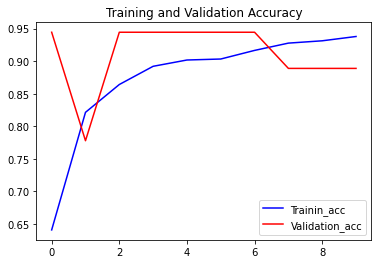

In [178]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

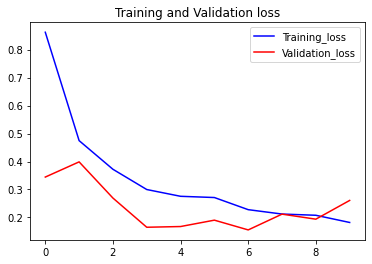

In [179]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

In [180]:
class_dict = {0:'diseased cotton leaf',
              1:'diseased cotton plant',
              2:'fresh cotton leaf',
              3:'fresh cotton plant' }

diseased cotton leaf


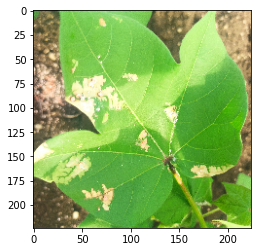

In [181]:
# New Data for testing 

file_path =  '/content/drive/MyDrive/data/test/diseased cotton leaf/dis_leaf (248).jpg'
test_image = cv2.imread(file_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print(pred_class)


diseased cotton plant


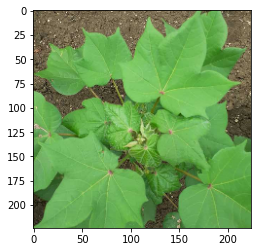

In [184]:
file_path =  '/content/drive/MyDrive/data/val/diseased cotton plant/dd (111)_iaip.jpg'
test_image = cv2.imread(file_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print(pred_class)

In [185]:
model.save("Cotton_Disease.h5")